# Term project #1
2조<br> 
윤기창 20181823<br>임채근 20181838<br>이창현 20182133<br>김창영 20181794<br>

## 1. 데이터 개요

코랩환경

In [26]:
# from google.colab import drive
# drive.mount('/content/drive')

In [27]:
# import pandas as pd
# import numpy as np

# path = '/content/drive/MyDrive/Colab Notebooks/Term/data'
# x_train = pd.read_csv(f'{path}/x_trn.csv', index_col=0)
# x_test = pd.read_csv(f'{path}/x_tst.csv', index_col=0)
# y_train = pd.read_csv(f'{path}/y_trn.csv', index_col=0)

캐글환경

In [28]:
import numpy as np
import pandas as pd

path_input = '/kaggle/input/uou-g03785-spring-2023-term-project-1/'
x_train = pd.read_csv(path_input+'x_trn.csv', index_col=0)
x_test = pd.read_csv(path_input+'x_tst.csv', index_col=0)
y_train = pd.read_csv(path_input+'y_trn.csv', index_col=0)

In [29]:
data = pd.concat([x_train, y_train], axis=1)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16512 non-null  float64
 1   HouseAge    16512 non-null  float64
 2   AveRooms    16512 non-null  float64
 3   AveBedrms   16512 non-null  float64
 4   Population  16512 non-null  float64
 5   AveOccup    16512 non-null  float64
 6   Latitude    16512 non-null  float64
 7   Longitude   16512 non-null  float64
 8   MedVal      16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


## 2. EDA 및 데이터 전처리

### 데이터 Heatmap

<Axes: >

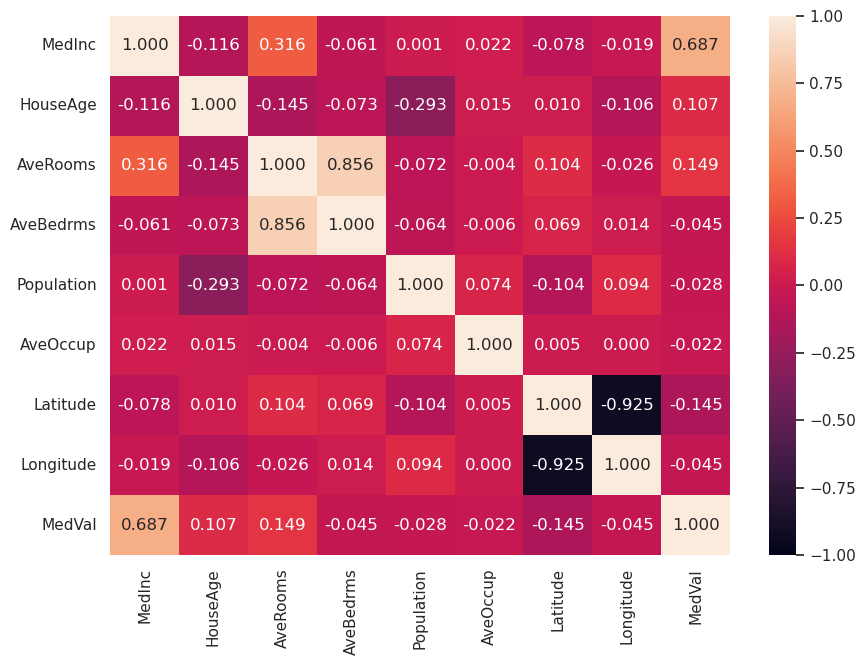

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(data = data.corr(), annot=True, fmt = '.3f', vmin = -1, vmax = 1)

### 데이터 분포

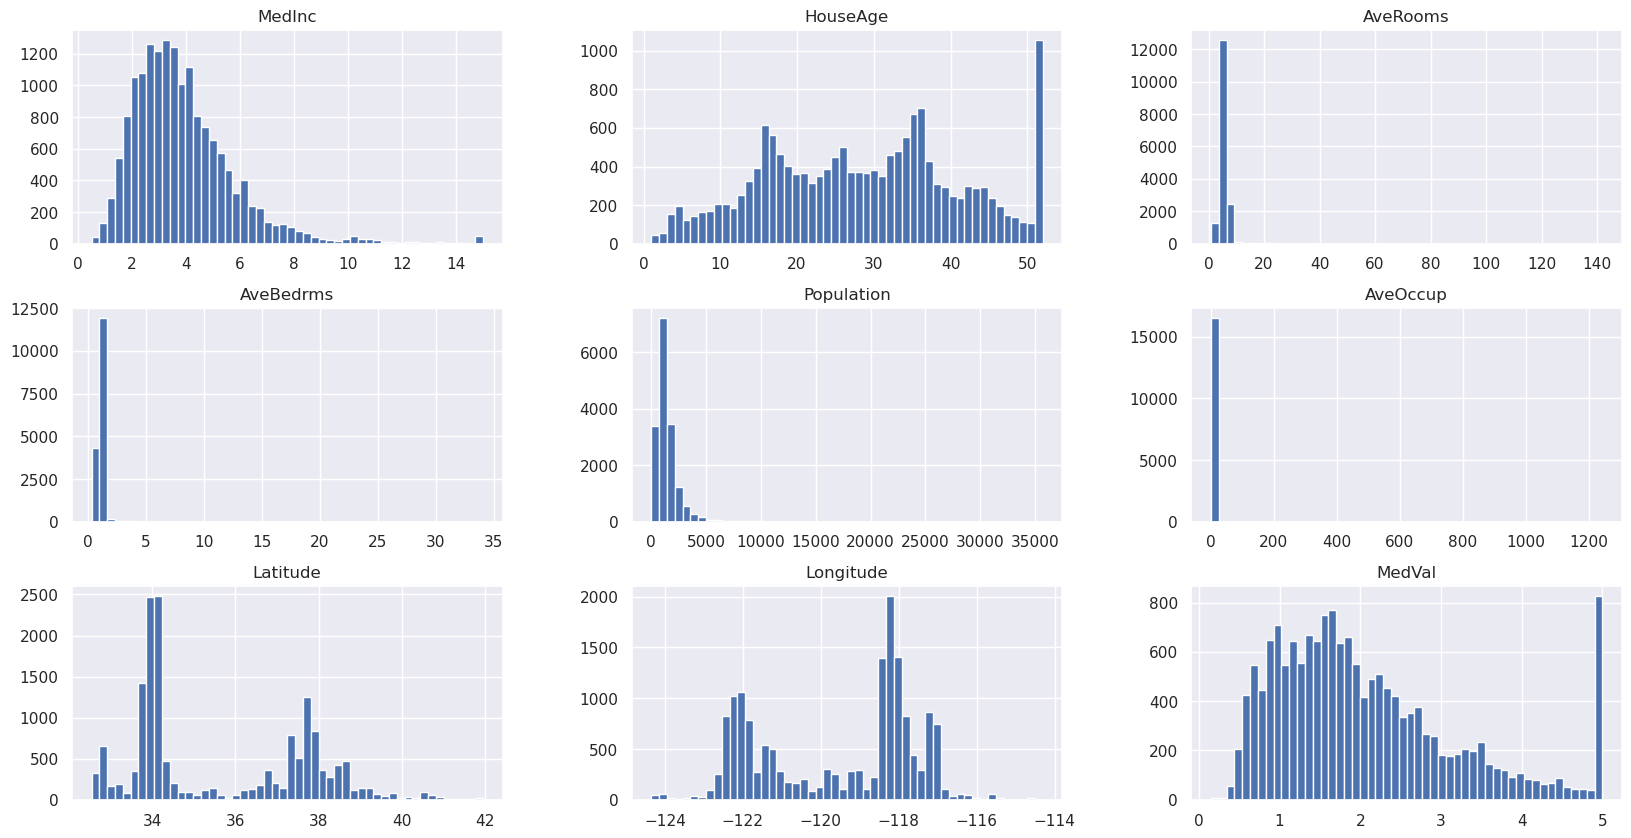

In [32]:
data.hist(bins=50, figsize=(20, 10));

### MedInc 구간변환 시각화

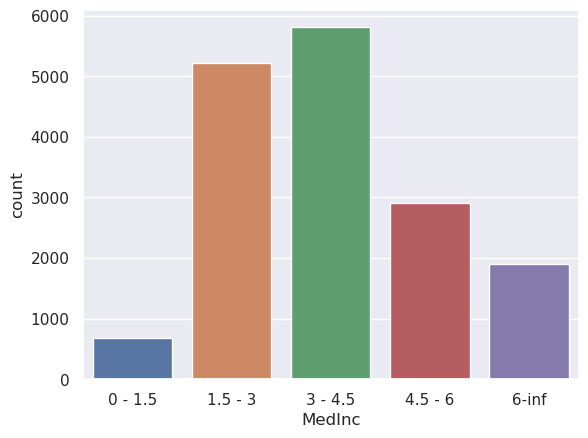

In [33]:
income_bins = pd.cut(data["MedInc"],
                     bins=[0,1.5,3,4.5,6,np.inf],
                     labels=["0 - 1.5","1.5 - 3","3 - 4.5","4.5 - 6"," 6-inf "])
sns.countplot(x = income_bins);

### MedVal 구간변환 후 빈도 시각화

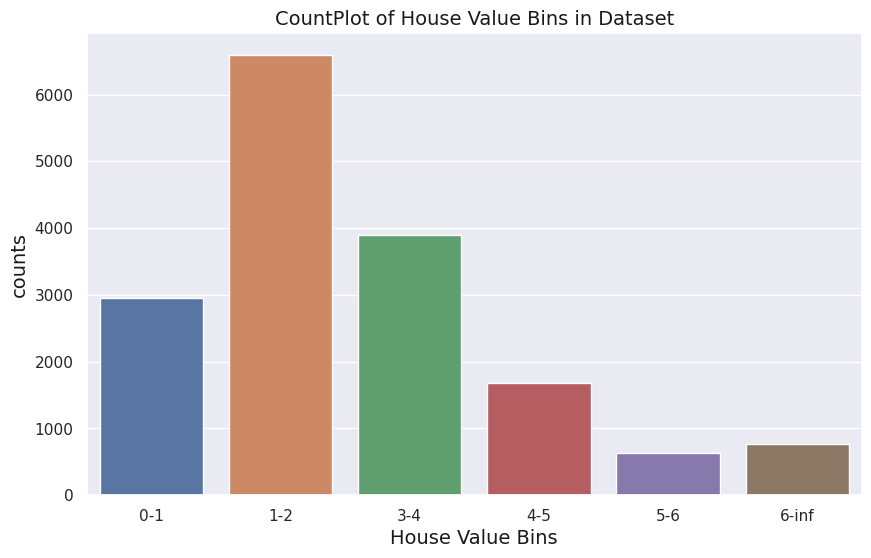

In [34]:
house_value_bins = pd.cut(x=data["MedVal"],
                          bins=(-np.inf, 1, 2, 3, 4, 5, np.inf),
                                labels=('0-1', '1-2', '3-4', '4-5', '5-6', '6-inf') )
## countpLot for the above chunks 
plt.figure(figsize=(10,6)) 
sns.countplot(x=house_value_bins) 
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k') 
plt.xlabel('House Value Bins', fontsize=14, c='k') 
plt.ylabel('counts', fontsize=14,c='k') 
plt.show() 

### 위도, 경도 활용한 시각화

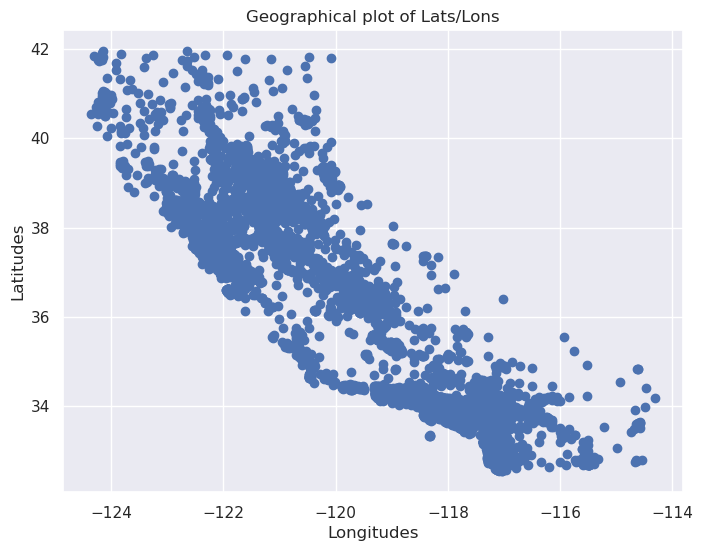

In [35]:
sns.set()
plt.figure(figsize=(8,6))#Figure size
plt.scatter('Longitude','Latitude',data=data)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

<Figure size 800x600 with 0 Axes>

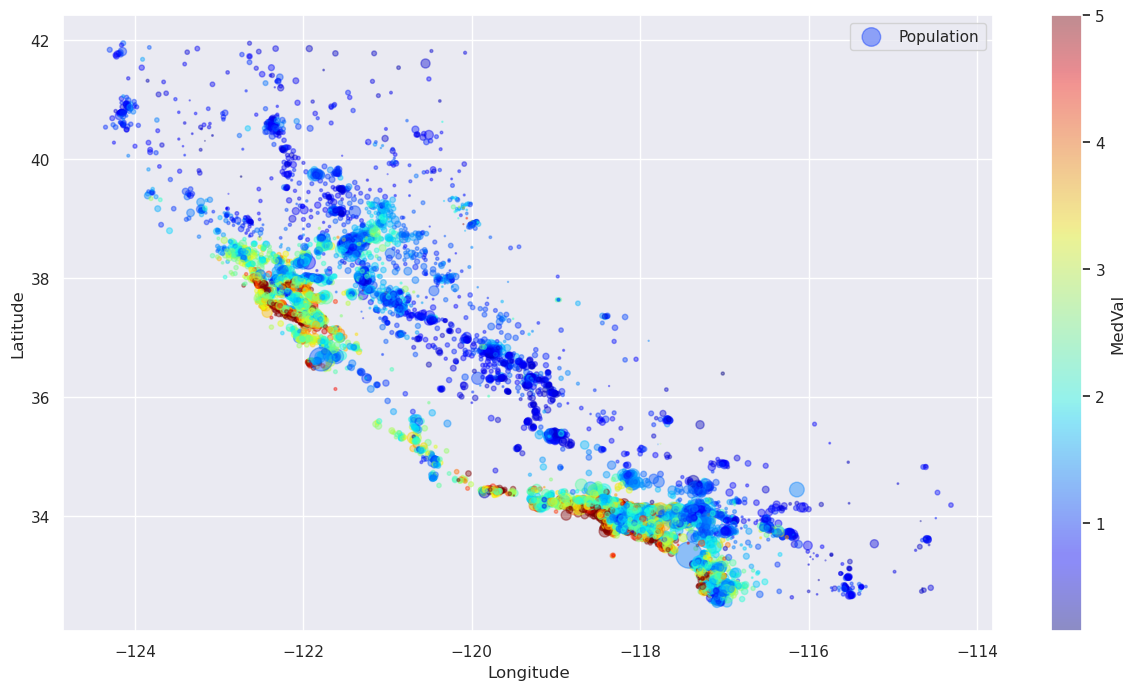

In [36]:
plt.figure(figsize=(8,6));
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
        s=data["Population"]/100, label="Population", figsize=(15,8),
        c="MedVal", cmap=plt.get_cmap("jet"),colorbar=True,
    );
plt.legend();

In [37]:
import patsy
import folium as folium
from folium import plugins
from folium.plugins import HeatMap
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = data[['Latitude', 'Longitude']]
latlong = [[row['Latitude'],row['Longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(latlong, radius=10).add_to(california_map)
california_map

### MedVal 구간별 pairplot

In [38]:
subset = data.copy()
subset["MedVal"] = pd.qcut(data["MedVal"], 6, retbins=False)

<Figure size 1200x1200 with 0 Axes>

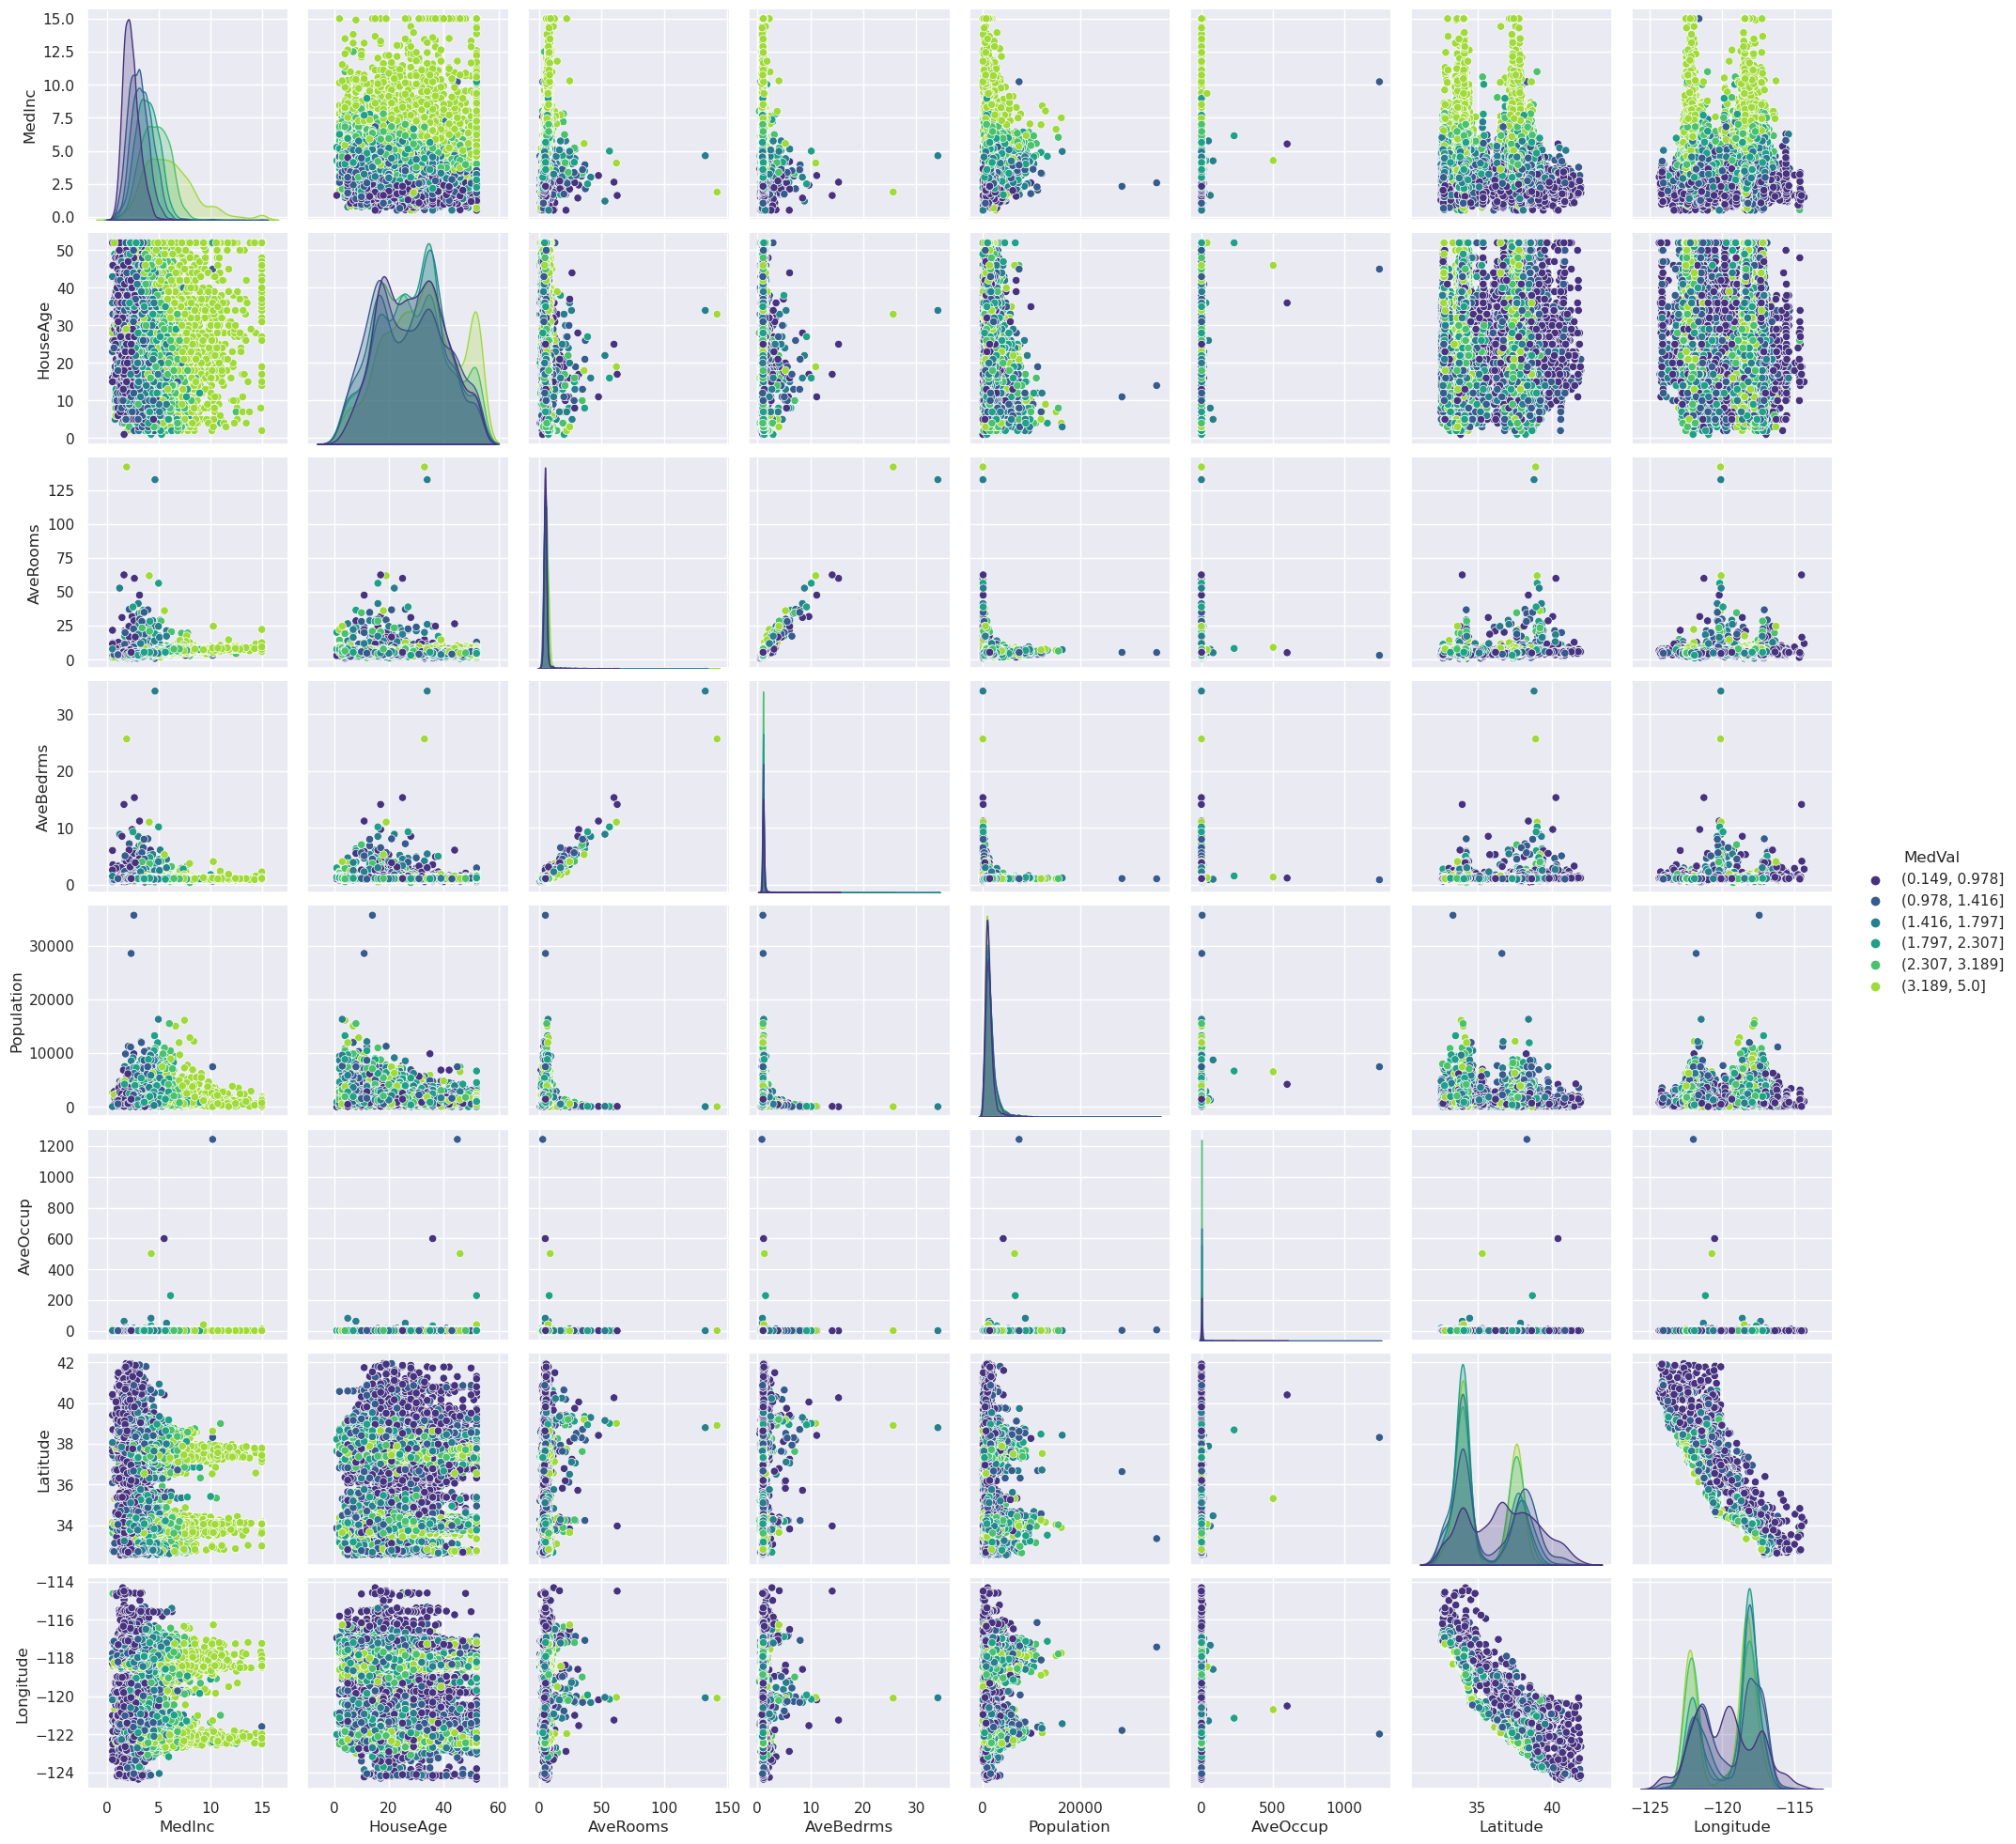

In [39]:
plt.figure(figsize=(12, 12))
sns.pairplot(data=subset, hue="MedVal", palette="viridis")

### VIF 계산

In [40]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['Feature'] = X_train.columns
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    return vif

In [41]:
vif = feature_engineering_XbyVIF(data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']])
print(vif)

      Feature  VIF_Factor
0      MedInc   11.294165
1    HouseAge    7.150258
2    AveRooms   45.169134
3   AveBedrms   42.156334
4  Population    2.862926
5    AveOccup    1.080612
6    Latitude  558.540561
7   Longitude  629.262631


In [42]:
vif = feature_engineering_XbyVIF(data[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup','Latitude', 'Longitude']])
print(vif)

      Feature  VIF_Factor
0      MedInc    5.934796
1    HouseAge    7.124060
2    AveRooms    6.393033
3  Population    2.862184
4    AveOccup    1.080286
5    Latitude  533.248232
6   Longitude  577.346968


In [43]:
vif = feature_engineering_XbyVIF(data[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup']])
print(vif)

      Feature  VIF_Factor
0      MedInc    4.975491
1    HouseAge    3.253427
2    AveRooms    4.890513
3  Population    2.091942
4    AveOccup    1.079822


### 이상치 제거

In [44]:
data.drop(data[(data['AveRooms'] > 75) | (data['AveBedrms'] > 20) | (data['Population'] > 20000) | (data['AveOccup']> 200)].index, inplace=True)
data.reset_index(inplace=True)

In [45]:
data.drop(columns='Id', inplace=True)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedVal
0,3.4167,35.0,8.307692,1.615385,158.0,4.051282,33.80,-116.80,1.000
1,8.4438,16.0,7.512195,1.000000,1902.0,3.313589,34.22,-118.64,3.900
2,4.3550,19.0,5.009890,1.148352,1949.0,2.141758,33.66,-118.01,4.292
3,1.7393,29.0,3.782383,1.246114,3580.0,4.637306,33.78,-118.17,1.402
4,4.4821,5.0,6.055063,1.094304,4620.0,2.924051,38.10,-122.20,2.100
...,...,...,...,...,...,...,...,...,...
16499,2.9853,28.0,3.242857,1.050000,366.0,2.614286,37.33,-121.91,1.875
16500,3.4612,36.0,4.802419,1.072581,718.0,2.895161,34.22,-118.44,1.788
16501,6.4598,18.0,7.840074,1.068015,2025.0,3.722426,33.62,-117.69,2.827
16502,3.5795,35.0,5.507634,1.015267,861.0,3.286260,34.08,-117.91,1.869


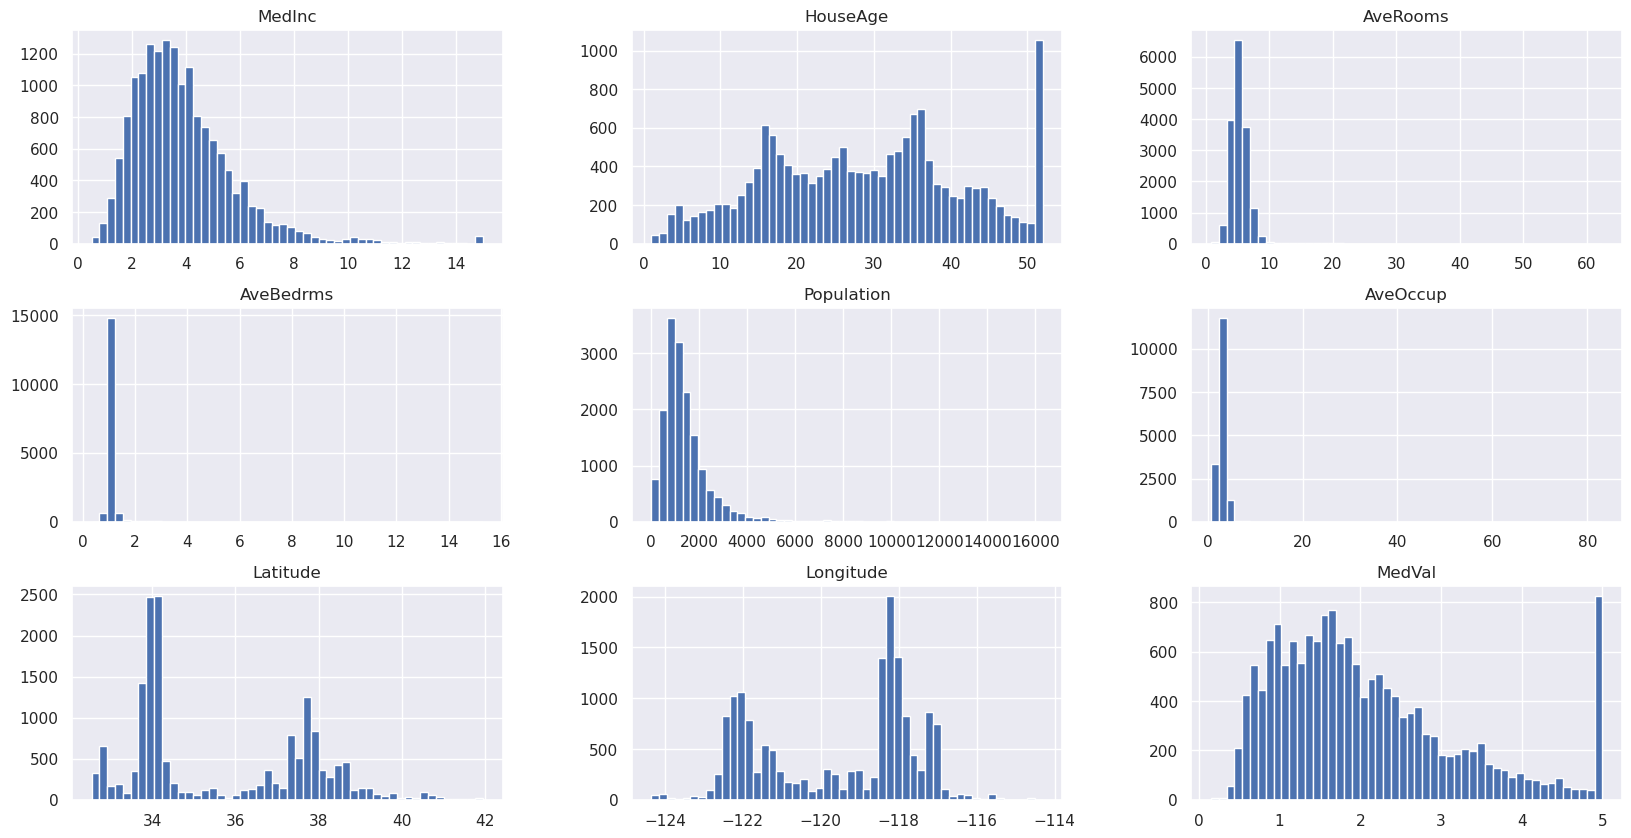

In [46]:
data.hist(bins=50, figsize=(20, 10));

## 3. 실험 설계

- 실험1. 4분위수 이상치 제거 + 정규화<br>
- 실험2. 위도, 경도 PCA 진행하여 대체변수 생성 + 특이값 이상치 제거 + 정규화<br>
- 실험3. 특이값 이상치 제거 + 변수 선택 + 정규화


## 4. 실험 결과 개요

- 실험1 결과

| 모델명 | lgbm | xgb | 
|:--------:|:--------:|:--------:|
| RMSE   | 0.4768   | 0.4808   |



- 실험2 결과

| 모델명 | lgbm | xgb | lgbm(bagging) | xgb(bagging) | 
|:--------:|:--------:|:--------:|:--------:|:--------:|
| RMSE   | 0.4713   | 0.4668   | 0.4706 | 0.4562 | 

- 실험3 결과

| 모델명 | lgbm | xgb | xgb(bagging) | lgbm+xgb(voting) | 
|:--------:|:--------:|:--------:|:--------:|:--------:|
| RMSE   | 0.4596   | 0.4485   | 0.4623 | 0.4483 | 

public 결과 기준

## 5. 모델

### pycaret 설치<br>
PyCaret은 Python 기반의 오픈 소스 머신 러닝 라이브러리. <br>
PyCaret은 머신 러닝 모델을 빠르게 구축하고 비교하기 위한 간편한 인터페이스와 다양한 기능을 제공.

In [47]:
!pip install pycaret
!pip install markupsafe==2.0.1
!pip install explainerdashboard
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 53.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 84.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 1

In [48]:
from pycaret.regression import *

reg = setup(data=data, target='MedVal', train_size=0.8, session_id=42, normalize=True, normalize_method = 'minmax', ignore_features = ['AveBedrms', 'Population'])

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c6e3291c160>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


,Description,Value
0,Session id,42
1,Target,MedVal
2,Target type,Regression
3,Original data shape,"(16504, 9)"
4,Transformed data shape,"(16504, 7)"
5,Transformed train set shape,"(13203, 7)"
6,Transformed test set shape,"(3301, 7)"
7,Ignore features,2
8,Numeric features,6
9,Preprocess,True


- Train : validation = 8: 2 분리 
- AveBedrms와 Population은 Target과의 상관성이 매우 낮기 때문에 학습에서 제외함
- MinMax Normalization 적용
- random seed 42로 고정

In [49]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### 단일 모델 학습

In [50]:
best3models = compare_models(sort='rmse', n_select=3, fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2959,0.2057,0.4534,0.8458,0.1365,0.1661,3.6780
lightgbm,Light Gradient Boosting Machine,0.3136,0.2249,0.4742,0.8314,0.1439,0.1786,0.6040
xgboost,Extreme Gradient Boosting,0.3182,0.2311,0.4807,0.8268,0.1457,0.1793,0.7520
et,Extra Trees Regressor,0.3352,0.2621,0.5118,0.8036,0.1509,0.1862,1.1660
rf,Random Forest Regressor,0.3371,0.2703,0.5198,0.7973,0.1545,0.1907,2.4660
gbr,Gradient Boosting Regressor,0.3708,0.2879,0.5363,0.7842,0.1636,0.2132,1.0460
knn,K Neighbors Regressor,0.3894,0.3459,0.5880,0.7409,0.1725,0.2099,0.0600
lar,Least Angle Regression,0.5147,0.5050,0.7105,0.6215,0.2182,0.3095,0.0380
br,Bayesian Ridge,0.5147,0.5050,0.7105,0.6215,0.2182,0.3095,0.0360
lr,Linear Regression,0.5147,0.5050,0.7105,0.6215,0.2182,0.3095,0.7960


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [51]:
best3models

 LGBMRegressor(random_state=42),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)]

lgbm tuning

In [52]:
best = best3models[0]
tuned_best = tune_model(best, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3451,0.2479,0.4979,0.8179,0.1555,0.2053
1,0.3557,0.2681,0.5178,0.7954,0.1588,0.2059
2,0.3535,0.2623,0.5122,0.8029,0.1578,0.2083
3,0.3574,0.2710,0.5206,0.8015,0.1557,0.1983
4,0.3506,0.2638,0.5136,0.7981,0.1563,0.1951
Mean,0.3524,0.2626,0.5124,0.8032,0.1568,0.2026
Std,0.0043,0.0080,0.0079,0.0078,0.0013,0.0050


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


xgb tuning

In [53]:
second = best3models[1]
tuned_second = tune_model(second, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3064,0.2070,0.4549,0.8479,0.1421,0.1803
1,0.3246,0.2387,0.4886,0.8179,0.1503,0.1867
2,0.3153,0.2252,0.4745,0.8309,0.1442,0.1814
3,0.3208,0.2355,0.4853,0.8274,0.1459,0.1765
4,0.3174,0.2280,0.4775,0.8255,0.1444,0.1740
Mean,0.3169,0.2269,0.4762,0.8299,0.1454,0.1798
Std,0.0061,0.0111,0.0118,0.0100,0.0027,0.0044


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0


### 변수 중요도 시각화

lgbm 변수 중요도

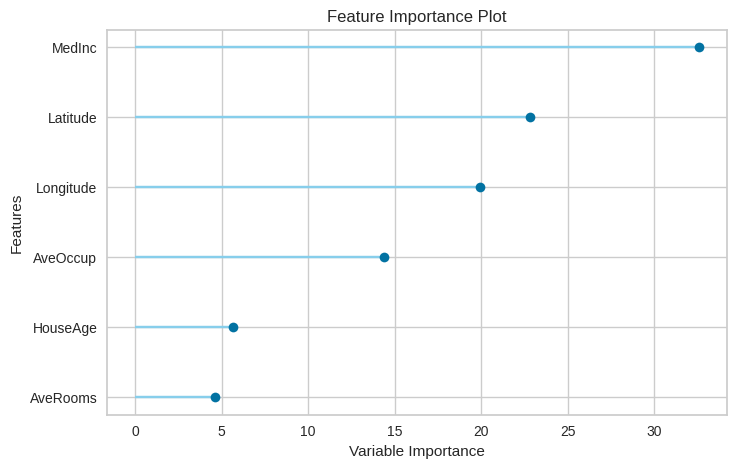

In [54]:
plot_model(tuned_best, plot = 'feature', use_train_data = True)

xgb 변수 중요도

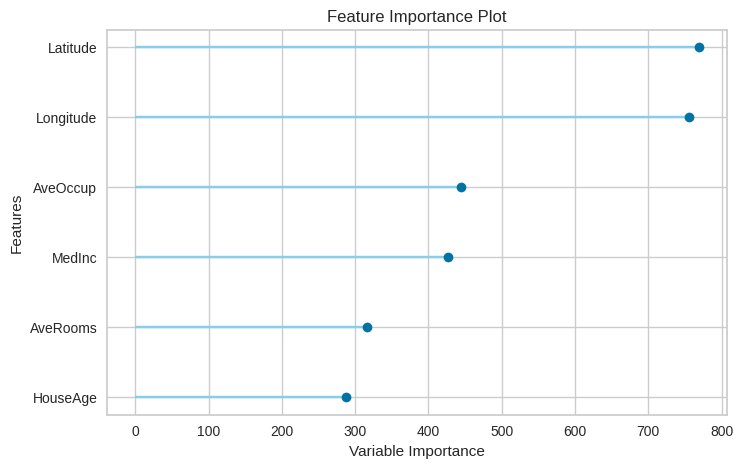

In [55]:
plot_model(tuned_second, plot = 'feature', use_train_data = True)

### 앙상블 학습
lgbm과 xgb, 두 모델을 하드 소프트 보팅(Soft Voting) 진행

In [56]:
blender_model2 = blend_models(estimator_list=[tuned_best, tuned_second], fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2901,0.1977,0.4446,0.8548,0.1368,0.1697
1,0.3037,0.2182,0.4672,0.8335,0.1415,0.1728
2,0.2965,0.2052,0.4530,0.8459,0.1365,0.1695
3,0.3029,0.2106,0.4589,0.8457,0.1364,0.1672
4,0.3012,0.2140,0.4626,0.8362,0.1376,0.1632
Mean,0.2989,0.2091,0.4573,0.8432,0.1378,0.1685
Std,0.0050,0.0072,0.0078,0.0076,0.0019,0.0032


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

전체 테스트 데이터 학습

In [57]:
final_model = finalize_model(blender_model2)
# evaluate_model(final_model)

## 학습 결과 분석

### Train/Val 잔차 비교 시각화

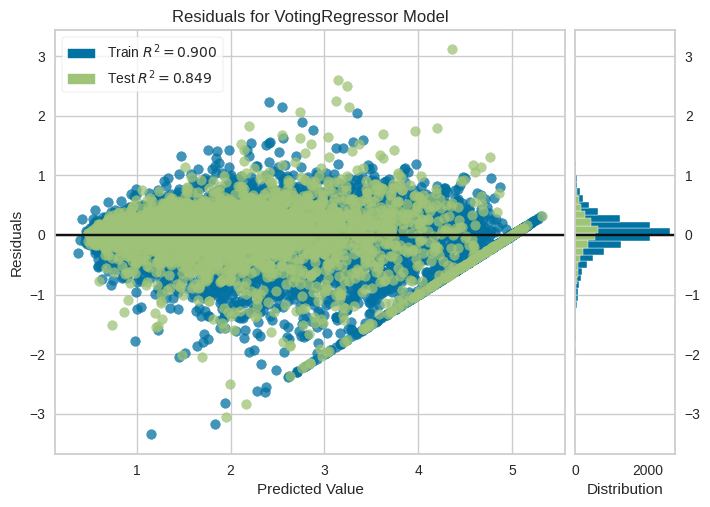

In [58]:
plot_model(blender_model2, plot = 'residuals', use_train_data = True)

### 예측 오차 시각화

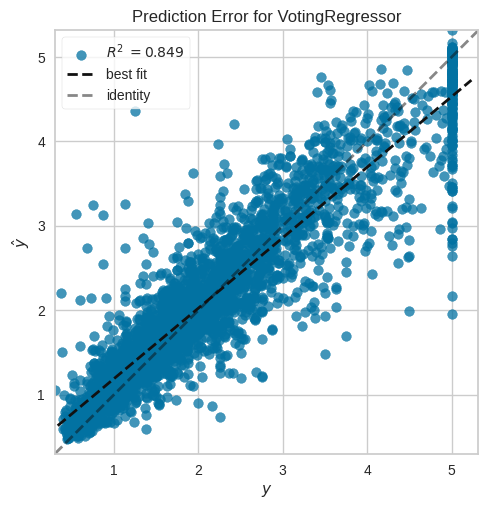

In [59]:
plot_model(blender_model2, plot = 'error', use_train_data = True)

### 학습 곡선

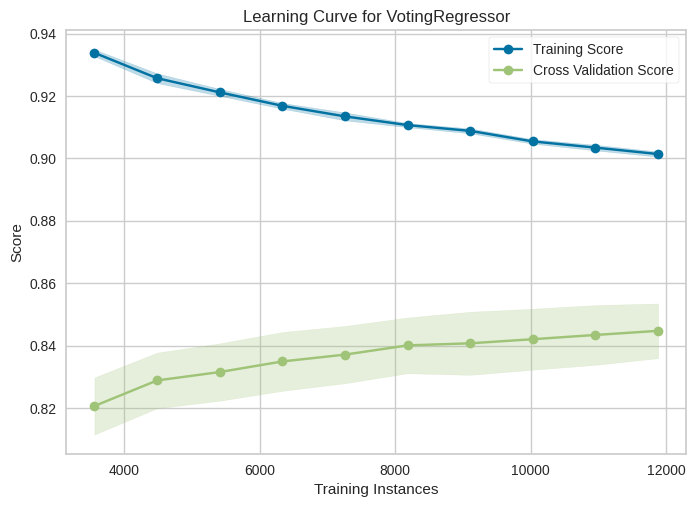

In [60]:
plot_model(blender_model2, plot = 'learning', use_train_data = True)

## 결과 예측

In [61]:
pred = predict_model(final_model, data=x_test)

### submission 생성

In [63]:
# df_submission = pd.read_csv(f'{path}/sample_submission.csv',sep = ',')
df_submission = pd.read_csv(f'{path_input}/sample_submission.csv',sep = ',')
df_submission['MedVal'] = pred['prediction_label']
df_submission.set_index("Id", inplace=True)
df_submission.to_csv('submission.csv')

## 프로젝트를 마치며...

다중공선성에 대한 다양한 시각
- 통계적 측면 
- ML 측면 